#Evaluation Of Metrics
Confusion Martix

False positive rate | Type-I error

False negative rate | Type-II error

True negative rate | Specificity

Negative predictive value

False discovery rate

True positive rate | Recall | Sensitivity

Positive predictive value | Precision

Accuracy

F beta score

F1 score

F2 score

Cohen Kappa

Matthews correlation coefficient

ROC curve

ROC AUC score

Corcondance And Discordance Ratio

Somars D

kendall's Tau

Log loss

Brier score

Gini Coefficient


In [ ]:

class Metrics:
  import pandas as pd
  import numpy as np
  from sklearn.metrics import confusion_matrix
  import seaborn as sns

  def __init__(self, y_test, y_pred, y_prob):
    self.y_test=y_test
    self.y_pred=y_pred
    self.y_prob=y_prob
    
  def CM(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    print('==================== Confusion Matrix ========================')
    sns.heatmap(confusion_matrix(self.y_test, self.y_pred),annot=True, )
    
    
  def FPR(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    tn, fp, fn, tp =confusion_matrix(self.y_test,self.y_pred).ravel()
    false_positive_rate=fp/(fp+tn)
    print("False Positive Rate is",false_positive_rate)


  def FNR(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    tn, fp, fn, tp =confusion_matrix(self.y_test,self.y_pred).ravel()
    false_negative_rate=fn/(fn+tp)
    print("False Negative Rate is",false_negative_rate)

  def Specificity(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    tn, fp, fn, tp =confusion_matrix(self.y_test,self.y_pred).ravel()
    true_negative_rate=tn/(tn+fp)
    print("Specificity is",true_negative_rate)

  def NPV(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred}) 
    tn, fp, fn, tp = confusion_matrix(self.y_test, self.y_pred).ravel()
    negative_predicted_values=tn/(tn+fn)
    print("Negative Predicted Value is",negative_predicted_value)

  def FDR(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    tn, fp, fn, tp = confusion_matrix(self.y_test, self.y_pred).ravel()
    false_discovery_rate=fp/(fp+tp)
    print("Flase Discovery Rate is",false_discovery_rate)

  def recall(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    tn, fp, fn, tp = confusion_matrix(self.y_test, self.y_pred).ravel()
    true_positive_rate=tp/(tp+fn)
    print("Recall is",true_positive_rate)

  def precision(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    tn, fp, fn, tp = confusion_matrix(self.y_test,self.y_pred).ravel()
    positive_predicted_value=tp/(tp+fp)
    print("Precision is",positive_predicted_value)

  def Accuracy(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    tn, fp, fn, tp = confusion_matrix(self.y_test,self.y_pred).ravel()
    score=(tp+tn)/(tp+fn+fp+tn)
    print("Accuracy is",score)

  def f_beta(self,beta):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    from sklearn.metrics import fbeta_score
    fbeta=fbeta_score(self.y_test,self.y_pred,beta)            
    print("f beta score is",fbeta)

  def Cohen_Kappa(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    from sklearn.metrics import cohen_kappa_score
    kappa=cohen_kappa_score(self.y_test,self.y_pred)
    print("Cohen kappa score is",kappa)
   
  def mcc(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    from sklearn.metrics import matthews_corrcoef
    mcc=matthews_corrcoef(self.y_test,self.y_pred)
    print("Matthews correlation coefficient is",mcc)

  def RA_Score(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    from sklearn.metrics import roc_auc_score
    ra_score=roc_auc_score(self.y_test,self.y_pred)
    print("AUC_ROC Score is",ra_score)

  def lloss(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    from sklearn.metrics import log_loss
    Logloss=log_loss(self.y_test,self.y_pred)
    print("Log Loss is",Logloss)


  def BSL(self):
    df1=pd.DataFrame({'y_test':self.y_test,'y_prob':self.y_prob})
    from sklearn.metrics import brier_score_loss
    BrierSL=brier_score_loss(self.y_test,self.y_prob)
    print("Brier Score Loss  is",BrierSL)

  def gini(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_pred':self.y_pred})
    assert (len(self.y_test) == len(self.y_pred))
    all = np.asarray(np.c_[self.y_test, self.y_pred, np.arange(len(self.y_test))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses
    giniSum = (len(self.y_test) + 1) / 2
    return giniSum / len(self.y_test)


  # Get fpr and tpr at different threshold
  def Fpr_Tpr(self,threshold):
    true_positive=0;
    false_positive=0;
    true_negative=0;
    false_negative=0;
    for i in range(len(self.y_test)):
        if self.y_test[i]==1:
            if self.y_prob[i]>=threshold:
                true_positive+=1
            else:
                false_negative+=1
        else:
            if self.y_prob[i]>=threshold:
                false_positive+=1
            else:
                true_negative+=1
    tpr=true_positive/(true_positive + false_negative)
    fpr=false_positive/(false_positive + true_negative)
    #print('True Positive Rate is:', tpr)
    #print('False Positive Rate is:', fpr)
    return tpr, fpr


  #### Plot AUC-ROC
  def Curve(self):
    df=pd.DataFrame({'y_test':self.y_test,'y_prob':self.y_prob})
    TPR=[]
    FPR=[]
    THRESHOLD=[]
    i=0


    #increemental step size for threshold
    dx_step=0.02;
    while(i<=1):
        threshold=i
        tpr,fpr=self.Fpr_Tpr(i)
        TPR.append(tpr)
        FPR.append(fpr)
        THRESHOLD.append(threshold)
        i+=dx_step

    #optimum threshold
    j=np.array(TPR)-np.array(FPR)
    zipped=zip(TPR,FPR,j)
    print("========Table for selecting Optimum Threshold=========")
    zz=pd.DataFrame(zipped)
    zz.columns=['TPR','FPR','j']
    zz['i']=THRESHOLD
    print(zz)
    print("====================================================")
    print("'Optimum threshold is")
    print(zz[zz['j']==max(j)])
    print("====================================================")

    import matplotlib.pyplot as plt  
    from numpy import trapz 
    from sklearn.metrics import roc_auc_score 
    plt.plot(FPR,TPR,marker='.');
    plt.plot(THRESHOLD,THRESHOLD,'--')
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve")
    plt.show()
    area = trapz(TPR, dx=dx_step)
    print('========================================================')
    print("AUC:Area under the ROC curve is", area)
    return
    

    

  def corcondance(self):
    df3=pd.DataFrame({'prob':self.y_prob,'resp':self.y_test})
    Event=df3.loc[self.y_test==1]
    Non_event=df3.loc[self.y_test==0]
    Pairs=0
    Conc=0
    Disc=0
    Tie=0
    for i in Event.prob:
      for j in Non_event.prob:
        Pairs+=1
        if (i>j):
          Conc+=1
        elif (i<j):
          Disc+=1
        else:
          Tie+=1
    print("===========================================================")
    print("Total pairs",Pairs)
    print("Total Conc", Conc)
    print("Total Disc", Disc)
    print("Total Tie", Tie)
    print("The percentage of Concordance",round(Conc/Pairs*100,3),"%")
    print("The percentage of Discordance",round(Disc/Pairs*100,3),"%")
    print("The percentage of Tie",round(Tie/Pairs*100,3),"%")


  def somers_d(self):
    df3=pd.DataFrame({'prob':self.y_prob,'resp':self.y_test})
    Event=df3.loc[self.y_test==1]
    Non_event=df3.loc[self.y_test==0]
    Pairs=0
    Conc=0
    Disc=0
    Tie=0
    for i in Event.prob:
      for j in Non_event.prob:
        Pairs+=1
        if (i>j):
          Conc+=1
        elif (i<j):
          Disc+=1
        else:
          Tie+=1
    print("==========================================================")
    print("Somers D is",(Conc-Disc-Tie)/Pairs)


  def kendallsTau(self):
    df3=pd.DataFrame({'prob':self.y_prob,'resp':self.y_test})
    Event=df3.loc[self.y_test==1]
    Non_event=df3.loc[self.y_test==0]
    Pairs=0
    Conc=0
    Disc=0
    Tie=0
    for i in Event.prob:
      for j in Non_event.prob:
        Pairs+=1
        if (i>j):
          Conc+=1
        elif (i<j):
          Disc+=1
        else:
          Tie+=1
    print('========================================================')
    print("Kendalls Tau is",(Conc-Disc)/(Conc+Disc))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
d=pd.read_csv(r'/content/drive/MyDrive/Thalamus internship/DS internship thalamus/output.csv')

In [ ]:
y_pred=[]
for i in d['prob']:
  if i > 0.42:
    y_pred.append(1)
  else:
    y_pred.append(0)

d['y_pred']=y_pred  

In [ ]:
d.columns=['y_test','y_prob','y_pred']

In [ ]:
k=Metrics(d['y_test'],d['y_pred'],d['y_prob'])

==================== Confusion Matrix ========================


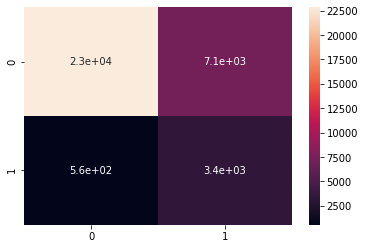

In [ ]:
k.CM()

========Table for selecting Optimum Threshold=========
         TPR       FPR         j     i
0   1.000000  1.000000  0.000000  0.00
1   1.000000  0.987468  0.012532  0.02
2   1.000000  0.940416  0.059584  0.04
3   0.998745  0.880497  0.118248  0.06
4   0.997992  0.818941  0.179051  0.08
5   0.996486  0.760460  0.236026  0.10
6   0.993474  0.708829  0.284645  0.12
7   0.991717  0.659537  0.332179  0.14
8   0.986948  0.615192  0.371756  0.16
9   0.982430  0.572083  0.410347  0.18
10  0.977912  0.530878  0.447033  0.20
11  0.968624  0.494018  0.474606  0.22
12  0.963604  0.456791  0.506814  0.24
13  0.953062  0.425043  0.528019  0.26
14  0.944779  0.393564  0.551215  0.28
15  0.934488  0.363053  0.571435  0.30
16  0.923444  0.336352  0.587092  0.32
17  0.912902  0.313494  0.599407  0.34
18  0.897841  0.291338  0.606503  0.36
19  0.884036  0.272290  0.611746  0.38
20  0.871737  0.255447  0.616290  0.40
21  0.858936  0.236867  0.622069  0.42
22  0.842620  0.220559  0.622062  0.44
23  0.826

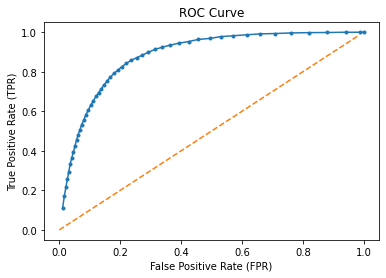

AUC:Area under the ROC curve is 0.7132078313253013


In [ ]:
k.Curve()

In [ ]:
k.RA_Score()

AUC_ROC Score is 0.8110345069624844


In [ ]:
k.FPR()

False Positive Rate is 0.23686672904691886


In [ ]:
k.f_beta(1)

f beta score is 0.4721953911963571


In [ ]:
k.f_beta(0.5)

f beta score is 0.3717625586650444


In [ ]:
k.f_beta(2)

f beta score is 0.6469787491492097


In [ ]:
k.BSL()

Brier Score Loss  is 0.14116564956714456


In [ ]:
k.gini()

0.5000147457827061

In [ ]:
k.lloss()

Log Loss is 7.792476907150287


In [ ]:
k.Fpr_Tpr(0.42)

(0.8589357429718876, 0.23686672904691886)

In [ ]:
k.corcondance()

Total pairs 119217216
Total Conc 105291696
Total Disc 13925520
Total Tie 0
The percentage of Concordance 88.319 %
The percentage of Discordance 11.681 %
The percentage of Tie 0.0 %


In [ ]:
k.somers_d()

Somers D is 0.7663840766085328


In [ ]:
k.kendallsTau()